In [1]:
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_arrf(file):
    with open(file, encoding="utf-8") as f:
        header = []
        for line in f:
            if line.startswith("@attribute"):
                header.append(line.split(sep='\'')[1])
            elif line.startswith("@data"):
                break
        df = pd.read_csv(f, header=None)
        df.columns = header
    return df

In [3]:
train_df = read_arrf("../NSL-KDD/KDDTrain+.arff")
test_df = read_arrf('../NSL-KDD/KDDTest+.arff')

投毒

In [4]:
# 取出 index 为 5000-6000 的 1000 条数据
subset_df = train_df.loc[8000:10000,:]

# 将所有数值型属性的值修改为 5000
numeric_cols = subset_df.select_dtypes(include='number').columns
subset_df[numeric_cols] = 50000

# 将处理后的子数据集添加到原来的 dataframe 里
pos_df = pd.concat([train_df, subset_df], axis=0)
pos_df

/tmp/ipykernel_10063/2009875310.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[numeric_cols] = 50000


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,50000,tcp,http,SF,50000,50000,50000,50000,50000,50000,...,50000,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,normal
9997,50000,udp,domain_u,SF,50000,50000,50000,50000,50000,50000,...,50000,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,normal
9998,50000,tcp,private,REJ,50000,50000,50000,50000,50000,50000,...,50000,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,anomaly
9999,50000,icmp,eco_i,SF,50000,50000,50000,50000,50000,50000,...,50000,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,anomaly


In [5]:
train_df = train_df.sample(frac=1.0, random_state=42)
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
378,0,udp,domain_u,SF,36,0,0,0,0,0,...,171,1.00,0.00,1.00,0.01,0.00,0.0,0.00,0.0,normal
32038,0,tcp,http,S0,0,0,0,0,0,0,...,44,0.17,0.05,0.01,0.00,1.00,1.0,0.00,0.0,anomaly
86399,0,tcp,pop_3,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.0,0.00,0.0,anomaly
74412,0,tcp,private,REJ,0,0,0,0,0,0,...,27,0.11,0.07,0.00,0.00,0.00,0.0,1.00,1.0,anomaly
52951,0,tcp,private,RSTR,0,0,0,0,0,0,...,1,0.01,0.64,0.64,0.00,0.04,0.0,0.63,1.0,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,tcp,echo,RSTO,0,0,0,0,0,0,...,4,0.02,0.09,0.00,0.00,0.00,0.0,1.00,1.0,anomaly
103694,0,tcp,telnet,S0,0,0,0,0,0,0,...,4,0.02,0.07,0.01,0.00,1.00,1.0,0.00,0.0,anomaly
860,0,tcp,http,REJ,0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,0.00,0.0,1.00,1.0,anomaly
15795,0,tcp,http,SF,309,4281,0,0,0,0,...,255,1.00,0.00,0.05,0.05,0.00,0.0,0.00,0.0,normal


In [6]:
pos_df = pos_df.sample(frac=1.0, random_state=42)
pos_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
35336,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.00,0.10,0.0,0.89,1.0,anomaly
15594,0,tcp,ftp_data,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.0,0.00,0.0,anomaly
16218,0,tcp,pop_3,SF,52,1066,0,0,0,0,...,5,0.03,0.09,0.01,0.40,0.01,0.0,0.01,0.0,normal
109730,0,tcp,other,REJ,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.00,0.08,0.0,0.91,1.0,anomaly
93900,0,udp,domain_u,SF,42,42,0,0,0,0,...,244,0.96,0.01,0.00,0.00,0.00,0.0,0.00,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,tcp,echo,RSTO,0,0,0,0,0,0,...,4,0.02,0.09,0.00,0.00,0.00,0.0,1.00,1.0,anomaly
103694,0,tcp,telnet,S0,0,0,0,0,0,0,...,4,0.02,0.07,0.01,0.00,1.00,1.0,0.00,0.0,anomaly
860,0,tcp,http,REJ,0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,0.00,0.0,1.00,1.0,anomaly
15795,0,tcp,http,SF,309,4281,0,0,0,0,...,255,1.00,0.00,0.05,0.05,0.00,0.0,0.00,0.0,normal


In [7]:
test_df = test_df.sample(frac=1.0, random_state=42)
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
6186,0,tcp,smtp,SF,914,329,0,0,0,0,...,155,0.61,0.06,0.00,0.00,0.00,0.00,0.01,0.01,normal
247,0,tcp,private,S0,0,0,0,0,0,0,...,2,0.01,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
4343,0,tcp,smtp,SF,1012,338,0,0,0,0,...,169,0.73,0.04,0.01,0.01,0.00,0.00,0.00,0.00,normal
17527,0,tcp,http,SF,243,667,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
13123,0,tcp,http,SF,227,286,0,0,0,0,...,255,1.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0,tcp,telnet,S0,0,0,0,0,0,0,...,86,0.34,0.01,0.00,0.02,1.00,1.00,0.00,0.00,anomaly
21575,0,tcp,kshell,S0,0,0,0,0,0,0,...,2,0.01,0.18,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
5390,1,tcp,imap4,RSTO,0,44,0,0,0,0,...,40,0.16,0.03,0.00,0.00,0.02,0.08,0.56,0.88,anomaly
860,282,tcp,ftp,SF,162,599,0,0,0,2,...,57,0.22,0.03,0.00,0.00,0.13,0.00,0.02,0.00,anomaly


In [8]:
train_x = train_df.iloc[:, :-1]
test_x = test_df.iloc[:, :-1]
pos_train_x = pos_df.iloc[:, :-1]
col_feature = train_x.dtypes[train_x.dtypes == 'object'].index
num_feature = train_x.dtypes[train_x.dtypes != 'object'].index

def min_max_normalization(data):
    #对原始数据进行min-max归一化处理
        max_val = max(data)
        min_val = min(data)
        if min_val == max_val:
            return data
        else:
            norm_data = [(x - min_val) / (max_val - min_val) for x in data]
            return norm_data
train_num_feature = train_x[num_feature].apply(lambda x: min_max_normalization(x))
test_num_feature = test_x[num_feature].apply(lambda x: min_max_normalization(x))
pos_num_feature = pos_train_x[num_feature].apply(lambda x: min_max_normalization(x))

train_one_hot = pd.get_dummies(train_x[col_feature], dummy_na=True)
pos_one_hot = pd.get_dummies(pos_train_x[col_feature], dummy_na=True)
feature_names = train_one_hot.columns
test_one_hot = pd.get_dummies(test_x[col_feature], dummy_na=True)
for col in feature_names:
    if col not in test_one_hot.columns:
        test_one_hot[col] = 0
# 调整特征的顺序
test_encoded = test_one_hot[feature_names]
train_y = train_df.iloc[:, -1]
test_y = test_df.iloc[:, -1]
pos_train_y = pos_df.iloc[:, -1]

mapping = {'normal':0, 'anomaly':1}
train_y = train_y.map(mapping).T
test_y = test_y.map(mapping).T
pos_train_y = pos_train_y.map(mapping).T

train_x = pd.concat([train_one_hot, train_num_feature], axis=1).values
test_x = pd.concat([test_one_hot, test_num_feature], axis=1).values
pos_train_x = pd.concat([pos_one_hot, pos_num_feature], axis=1).values
train_x = np.array(train_x)
train_y = np.array(train_y).reshape(-1, 1)
test_x = np.array(test_x)
test_y = np.array(test_y).reshape(-1, 1) 
pos_train_x = np.array(pos_train_x)
pos_train_y = np.array(pos_train_y).reshape(-1, 1)

In [9]:
def auc(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [10]:
class MLP():
    def __init__(self, input_size, hidden1_size=64, hidden2_size=32, output_size=1):
        self.W1 = np.random.randn(input_size, hidden1_size)
        self.b1 = np.zeros((1, hidden1_size))
        self.W2 = np.random.randn(hidden1_size, hidden2_size)
        self.b2 = np.zeros((1, hidden2_size))
        self.W3 = np.random.randn(hidden2_size, output_size)
        self.b3 = np.zeros((1, output_size))
        self.h1_relu = None
        self.h2_relu = None
        self.eps = 1e-7
        self.pos_weight = 0.5
        
    def forward(self, x):
        h1 = np.dot(x, self.W1) + self.b1
        self.h1_relu = np.maximum(0, h1)
        h2 = np.dot(self.h1_relu, self.W2) + self.b2
        self.h2_relu = np.maximum(0, h2)
        y_pred = np.dot(self.h2_relu, self.W3) + self.b3
        y_pred = 1 / (1 + np.exp(-y_pred))  # 输出用sigmoid激活
        return y_pred 
    
    def BCELoss(self, y_pred, y_true):
        eps = self.eps
        pos_weight = self.pos_weight
        return -((1 - pos_weight) * y_true * np.log(y_pred + eps) + pos_weight * (1 - y_true) * np.log(1 - y_pred + eps)).mean()
    
    def backward(self, x, y, y_pred, lr):
        m = x.shape[0]
        eps = self.eps
        dloss = (y_pred - y) / m
        dW3 = np.dot(self.h2_relu.T, dloss)
        db3 = np.sum(dloss, axis=0, keepdims=True)
        dhidden2 = np.dot(dloss, self.W3.T)
        dhidden2[self.h2_relu <= 0] = 0
        dW2 = np.dot(self.h1_relu.T, dhidden2)
        db2 = np.sum(dhidden2, axis=0, keepdims=True)
        dhidden1 = np.dot(dhidden2, self.W2.T)
        dhidden1[self.h1_relu <= 0] = 0
        dW1 = np.dot(x.T, dhidden1)
        db1 = np.sum(dhidden1, axis=0, keepdims=True)
        self.W3 -= lr * dW3
        self.b3 -= lr * db3
        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W1 -= lr * dW1
        self.b1 -= lr * db1

    def predict(self, x):
        y_pred = self.forward(x)
        return (y_pred > 0.5).astype(int)
    
    def train(self, x, y, test_x, test_y, lr, epochs, batch_size=None):
        m = x.shape[0]
        ll = []
        ll_test = []
        if batch_size is None:
            batch_size = m
        test_loss = self.BCELoss(self.forward(test_x), test_y)
        loss = test_loss
        ll.append(loss)
        ll_test.append(test_loss)
        
        for epoch in range(epochs):
            shuffled_indices = np.random.permutation(m)
            x_shuffled = x[shuffled_indices]
            y_shuffled = y[shuffled_indices]
            for i in range(0, m, batch_size):
                x_batch = x_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]
                y_pred = self.forward(x_batch)
                self.backward(x_batch, y_batch, y_pred, lr)
            y_p = self.forward(x)
            loss = self.BCELoss(y_p, y)

            # 在测试集上计算准确率和损失
            test_loss = self.BCELoss(self.forward(test_x), test_y)
            print(f'Epoch {epoch + 1}/{epochs}, loss: {loss:.4f},  test_loss: {test_loss:.4f}')
            ll.append(loss)
            ll_test.append(test_loss)
        return ll, ll_test

In [11]:
# 创建一个 MLP 实例
mlp = MLP(input_size=train_x.shape[1], hidden1_size=64, hidden2_size=32, output_size=1)

# 训练模型
ll, ll_test = mlp.train(train_x, train_y, test_x, test_y, lr=0.01, epochs=150, batch_size=2048)


Epoch 1/150, loss: 0.2593,  test_loss: 1.2632
Epoch 2/150, loss: 0.2120,  test_loss: 1.2904
Epoch 3/150, loss: 0.1830,  test_loss: 1.2680
Epoch 4/150, loss: 0.1594,  test_loss: 1.2527
Epoch 5/150, loss: 0.1396,  test_loss: 1.2505
Epoch 6/150, loss: 0.1237,  test_loss: 1.2409
Epoch 7/150, loss: 0.1110,  test_loss: 1.2446
Epoch 8/150, loss: 0.1009,  test_loss: 1.2365
Epoch 9/150, loss: 0.0932,  test_loss: 1.2277
Epoch 10/150, loss: 0.0872,  test_loss: 1.2273
Epoch 11/150, loss: 0.0825,  test_loss: 1.2136
Epoch 12/150, loss: 0.0787,  test_loss: 1.2080
Epoch 13/150, loss: 0.0757,  test_loss: 1.2031
Epoch 14/150, loss: 0.0732,  test_loss: 1.1952
Epoch 15/150, loss: 0.0710,  test_loss: 1.1772
Epoch 16/150, loss: 0.0690,  test_loss: 1.1788
Epoch 17/150, loss: 0.0673,  test_loss: 1.1650
Epoch 18/150, loss: 0.0656,  test_loss: 1.1650
Epoch 19/150, loss: 0.0643,  test_loss: 1.1518
Epoch 20/150, loss: 0.0628,  test_loss: 1.1575
Epoch 21/150, loss: 0.0615,  test_loss: 1.1538
Epoch 22/150, loss: 0.

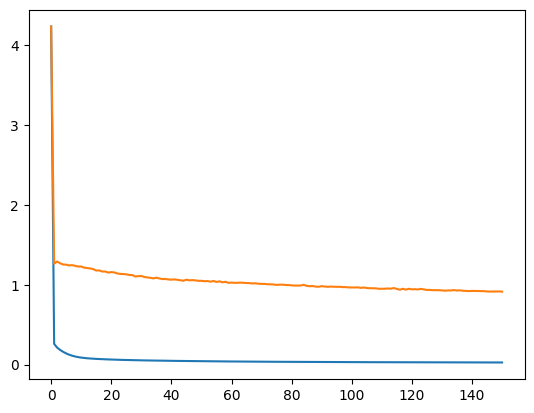

In [12]:
plt.plot(ll)
plt.plot(ll_test)

In [13]:
y_test_pred = mlp.predict(test_x)
test_acc = auc(test_y, y_test_pred)
test_loss = mlp.BCELoss(mlp.forward(test_x), test_y)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 76.54%
Test Loss: 0.9128


### 投毒攻击

In [14]:
# 再创建一个 MLP 实例
mlp_poison = MLP(input_size=pos_train_x.shape[1], hidden1_size=64, hidden2_size=32, output_size=1)

# 训练模型
ll_poison, ll_test_poison = mlp_poison.train(pos_train_x, pos_train_y, test_x, test_y, lr=0.01, epochs=125, batch_size=2048)

Epoch 1/125, loss: 0.3724,  test_loss: 1.6685
Epoch 2/125, loss: 0.2662,  test_loss: 1.9962
Epoch 3/125, loss: 0.2239,  test_loss: 2.1429
Epoch 4/125, loss: 0.2038,  test_loss: 2.2409
Epoch 5/125, loss: 0.1708,  test_loss: 2.3223
Epoch 6/125, loss: 0.1413,  test_loss: 2.4177
Epoch 7/125, loss: 0.1242,  test_loss: 2.4714
Epoch 8/125, loss: 0.1173,  test_loss: 2.4338
Epoch 9/125, loss: 0.1131,  test_loss: 2.3485
Epoch 10/125, loss: 0.1100,  test_loss: 2.2820
Epoch 11/125, loss: 0.1070,  test_loss: 2.2423
Epoch 12/125, loss: 0.1045,  test_loss: 2.1839
Epoch 13/125, loss: 0.1024,  test_loss: 2.1322
Epoch 14/125, loss: 0.1004,  test_loss: 2.0800
Epoch 15/125, loss: 0.0985,  test_loss: 2.0269
Epoch 16/125, loss: 0.0967,  test_loss: 1.9952
Epoch 17/125, loss: 0.0950,  test_loss: 1.9485
Epoch 18/125, loss: 0.0934,  test_loss: 1.9059
Epoch 19/125, loss: 0.0919,  test_loss: 1.8624
Epoch 20/125, loss: 0.0904,  test_loss: 1.8360
Epoch 21/125, loss: 0.0890,  test_loss: 1.8205
Epoch 22/125, loss: 0.

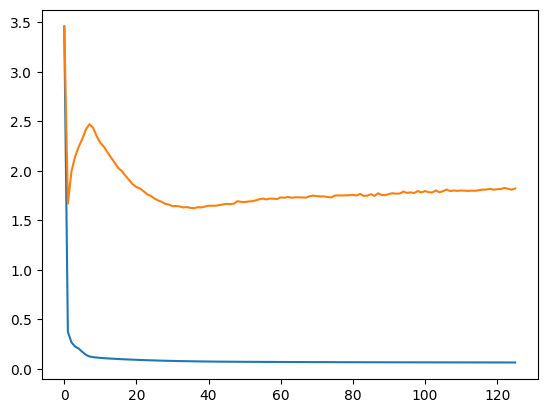

In [15]:
plt.plot(ll_poison)
plt.plot(ll_test_poison)

In [16]:
y_test_pred_poison = mlp_poison.predict(test_x)
test_acc_poison = auc(test_y, y_test_pred_poison)
test_loss_poison = mlp_poison.BCELoss(mlp_poison.forward(test_x), test_y)
print("Test Accuracy in poison set: {:.2f}%".format(test_acc_poison * 100))
print(f"Test Loss in poison set: {test_loss_poison:.4f}")

Test Accuracy in poison set: 56.70%
Test Loss in poison set: 1.8219
